# 1. Etude exploratoire préliminaire

### Import packages

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_fscore_support, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from slugify import slugify

### Load Dataset

In [2]:
data_head = ["Statut du compte courant existant", "Durée en mois", "Historique de crédit", "Objectif",
"Montant du crédit", "Compte d'épargne", "Emploi actuel depuis", "Taux de versement en pourcentage du revenu disponible", "Statut personnel et sexe", "Autres débiteurs",
"Résidence actuelle depuis", "Propriété", "Age en années", "Autres plans de versement",
"Logement", "Nombre de crédits existants dans cette banque", "Travail", "Nombre de personnes à charge", "Téléphone", "Travailleur étranger", "y"]

data_head = [slugify(string) for string in data_head]

data_with_column_name = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv", names=data_head)
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv", header=None)

### Descriptive statistiques

In [3]:
# shape
print(data_with_column_name.shape)

(1000, 21)


In [4]:
# types
print(data_with_column_name.dtypes)

statut-du-compte-courant-existant                        object
duree-en-mois                                             int64
historique-de-credit                                     object
objectif                                                 object
montant-du-credit                                         int64
compte-d-epargne                                         object
emploi-actuel-depuis                                     object
taux-de-versement-en-pourcentage-du-revenu-disponible     int64
statut-personnel-et-sexe                                 object
autres-debiteurs                                         object
residence-actuelle-depuis                                 int64
propriete                                                object
age-en-annees                                             int64
autres-plans-de-versement                                object
logement                                                 object
nombre-de-credits-existants-dans-cette-b

**Enfin d'éviter de considérer la variables comme une variable numérique nous allons convertir en object**

In [5]:
data_with_column_name['y'] = data_with_column_name['y'].astype(str)
data[20] = data[20].astype(str)

In [6]:
# head
pd.set_option('display.width', 200)
print(data.head(20))

     0   1    2    3      4    5    6   7    8     9   ...    11  12    13    14 15    16 17    18    19 20
0   A11   6  A34  A43   1169  A65  A75   4  A93  A101  ...  A121  67  A143  A152  2  A173  1  A192  A201  1
1   A12  48  A32  A43   5951  A61  A73   2  A92  A101  ...  A121  22  A143  A152  1  A173  1  A191  A201  2
2   A14  12  A34  A46   2096  A61  A74   2  A93  A101  ...  A121  49  A143  A152  1  A172  2  A191  A201  1
3   A11  42  A32  A42   7882  A61  A74   2  A93  A103  ...  A122  45  A143  A153  1  A173  2  A191  A201  1
4   A11  24  A33  A40   4870  A61  A73   3  A93  A101  ...  A124  53  A143  A153  2  A173  2  A191  A201  2
5   A14  36  A32  A46   9055  A65  A73   2  A93  A101  ...  A124  35  A143  A153  1  A172  2  A192  A201  1
6   A14  24  A32  A42   2835  A63  A75   3  A93  A101  ...  A122  53  A143  A152  1  A173  1  A191  A201  1
7   A12  36  A32  A41   6948  A61  A73   2  A93  A101  ...  A123  35  A143  A151  1  A174  1  A192  A201  1
8   A14  12  A32  A43   3059

In [7]:
# info
print(data_with_column_name.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   statut-du-compte-courant-existant                      1000 non-null   object
 1   duree-en-mois                                          1000 non-null   int64 
 2   historique-de-credit                                   1000 non-null   object
 3   objectif                                               1000 non-null   object
 4   montant-du-credit                                      1000 non-null   int64 
 5   compte-d-epargne                                       1000 non-null   object
 6   emploi-actuel-depuis                                   1000 non-null   object
 7   taux-de-versement-en-pourcentage-du-revenu-disponible  1000 non-null   int64 
 8   statut-personnel-et-sexe                               1000

In [8]:
# descriptions, change precision to 3 places
pd.set_option('display.precision', 3)
print(data.describe())

             1          4         7         10        12        15        17
count  1000.000   1000.000  1000.000  1000.000  1000.000  1000.000  1000.000
mean     20.903   3271.258     2.973     2.845    35.546     1.407     1.155
std      12.059   2822.737     1.119     1.104    11.375     0.578     0.362
min       4.000    250.000     1.000     1.000    19.000     1.000     1.000
25%      12.000   1365.500     2.000     2.000    27.000     1.000     1.000
50%      18.000   2319.500     3.000     3.000    33.000     1.000     1.000
75%      24.000   3972.250     4.000     4.000    42.000     2.000     1.000
max      72.000  18424.000     4.000     4.000    75.000     4.000     2.000


### Distribution of Values

In [9]:
# class distribution
print(data.groupby(20).size()/data[20].size)

20
1    0.7
2    0.3
dtype: float64


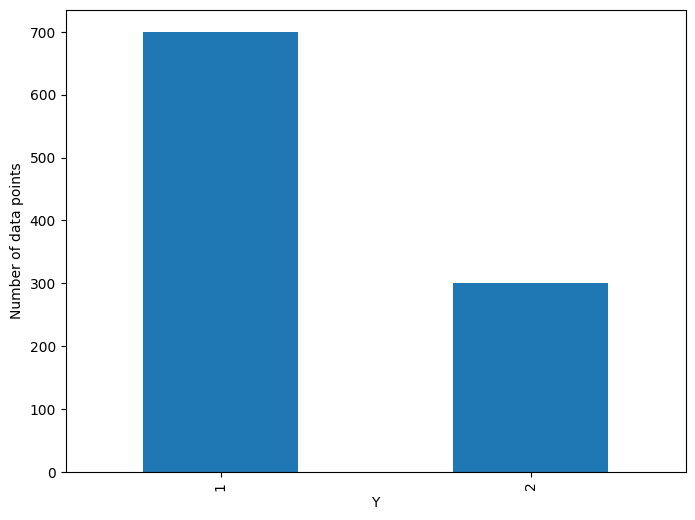

In [10]:
plt.figure(figsize=(8,6))
data[20].value_counts().plot(kind='bar')
plt.ylabel('Number of data points')
plt.xlabel('Y')
plt.show()

### Nous allons séparé les variables quantitatives des variables qualitatives

In [11]:
numeric_variables = data_with_column_name.select_dtypes(include=[np.number])
numeric_variables.columns

Index(['duree-en-mois', 'montant-du-credit', 'taux-de-versement-en-pourcentage-du-revenu-disponible', 'residence-actuelle-depuis', 'age-en-annees', 'nombre-de-credits-existants-dans-cette-banque',
       'nombre-de-personnes-a-charge'],
      dtype='object')

In [12]:
object_variables = data_with_column_name.select_dtypes(include=[np.object_])
object_variables.columns

Index(['statut-du-compte-courant-existant', 'historique-de-credit', 'objectif', 'compte-d-epargne', 'emploi-actuel-depuis', 'statut-personnel-et-sexe', 'autres-debiteurs', 'propriete',
       'autres-plans-de-versement', 'logement', 'travail', 'telephone', 'travailleur-etranger', 'y'],
      dtype='object')

### Correlation de nos variables quantitatives

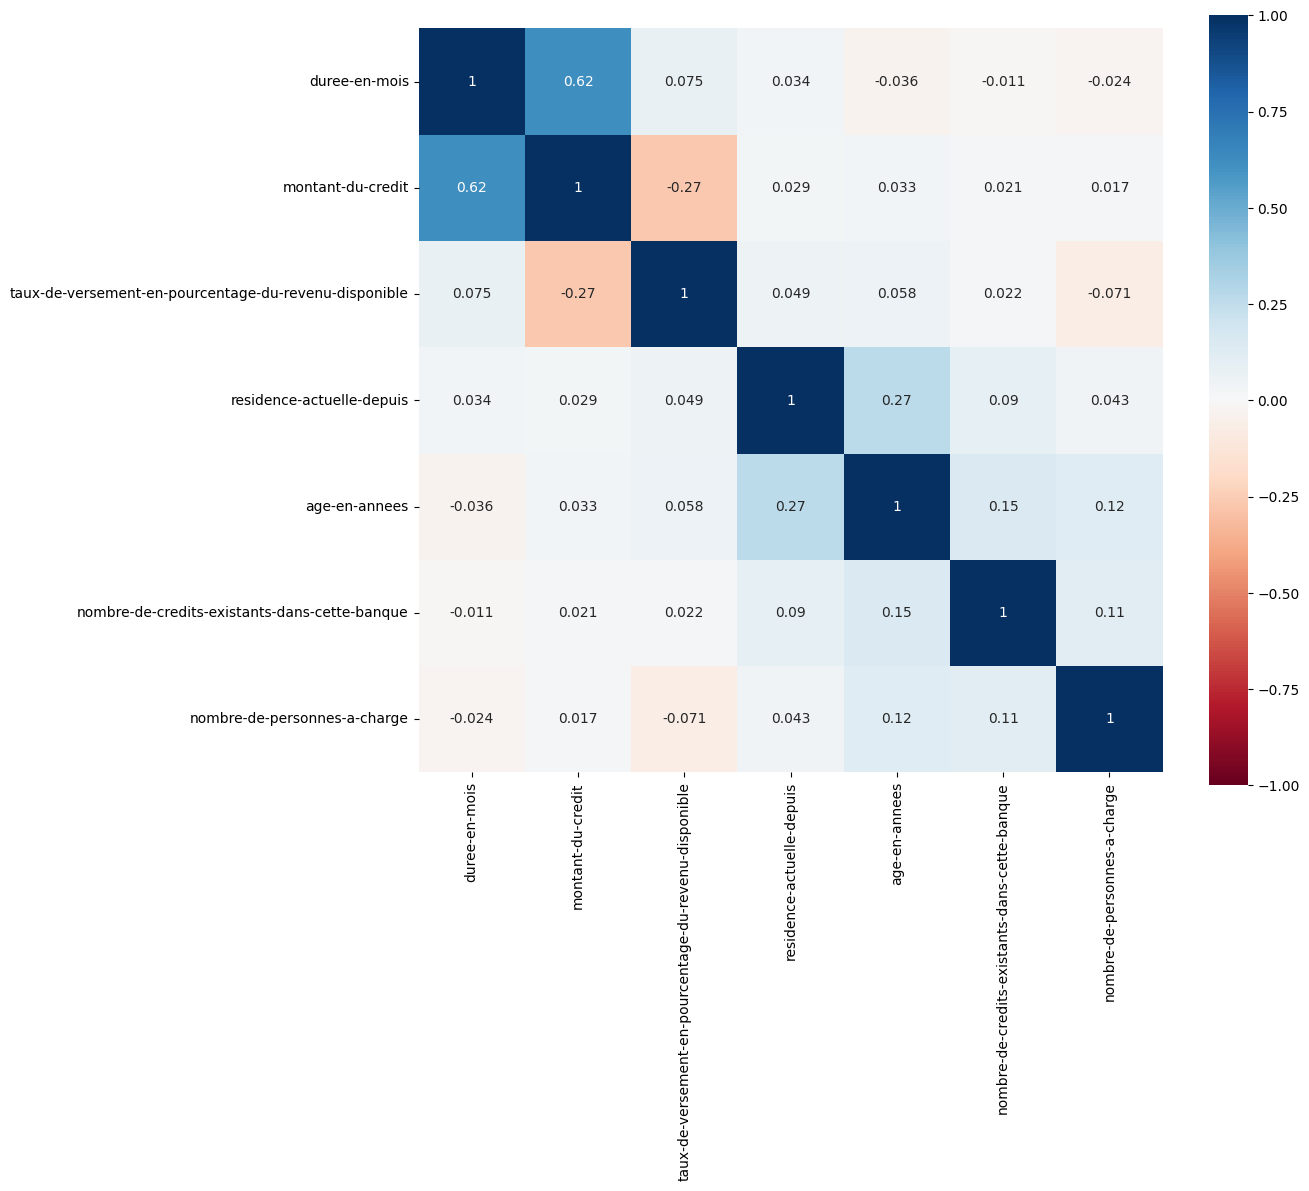

In [13]:
plt.figure(figsize = (12,10))
sns.heatmap(numeric_variables.corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

**On observe une assez forte corrélation entre les variables "durée en mois" et "montant" ce qui pourrait se traduire par "plus le montant du pret est elevé plus longue est la durée accordée pour le rembourssement"**

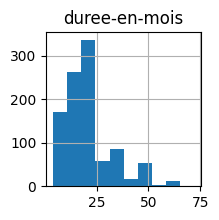

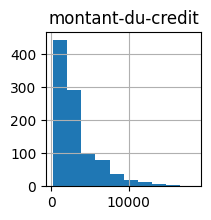

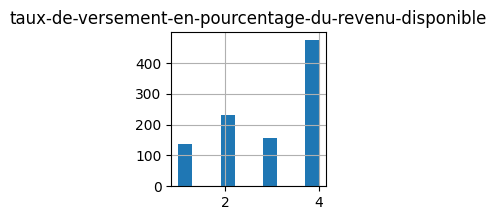

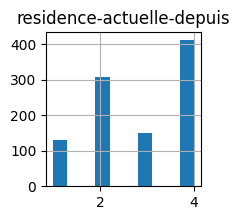

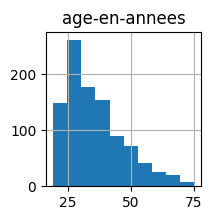

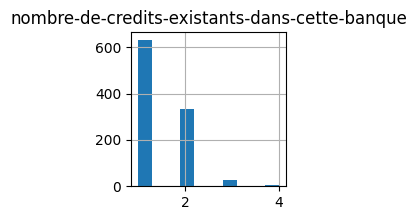

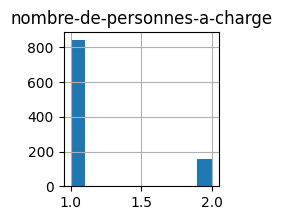

In [14]:
# Data visualizations

# histograms
for title in numeric_variables.columns:
  plt.figure(figsize = (2,2))
  numeric_variables[title].hist()
  plt.title(title)
plt.show()

**Nous observons comment sont repartis les données dans nos variables quantitatives**

### Recherche des outliers

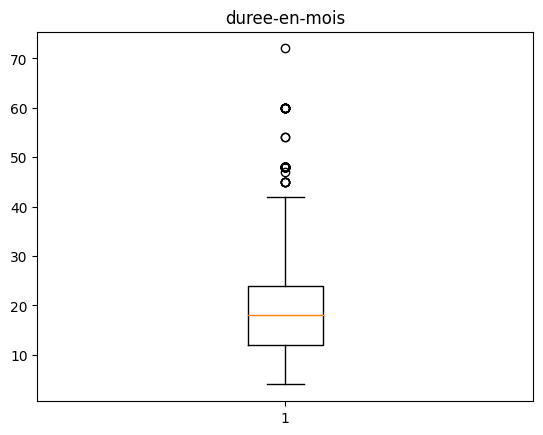

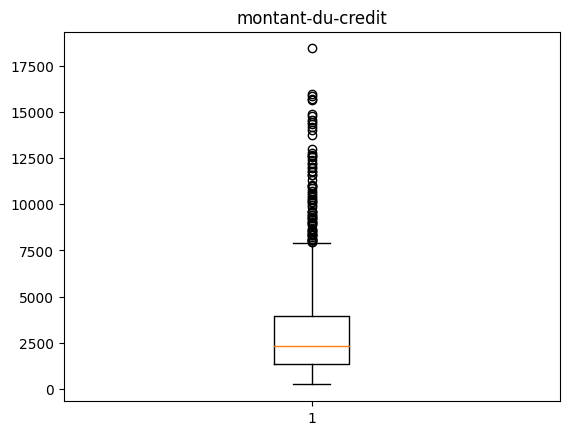

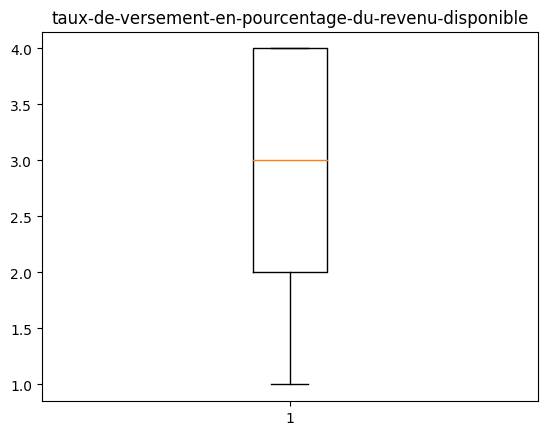

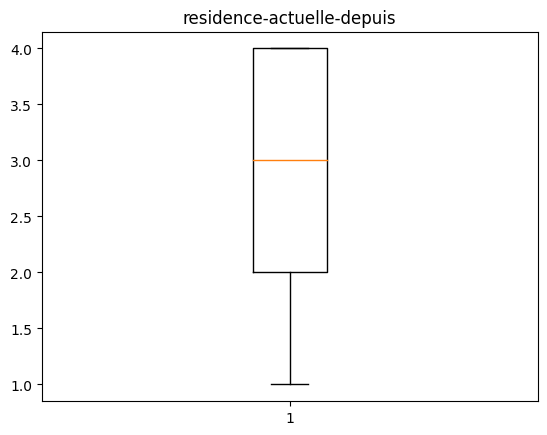

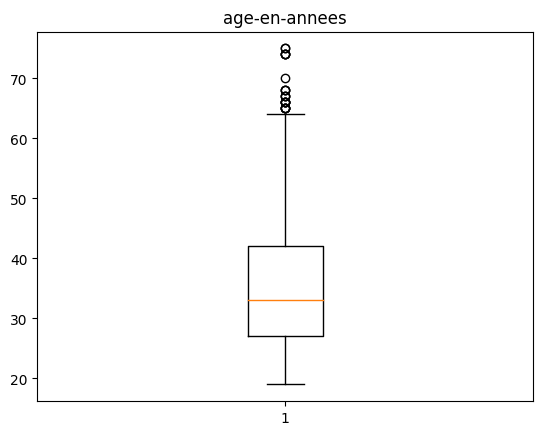

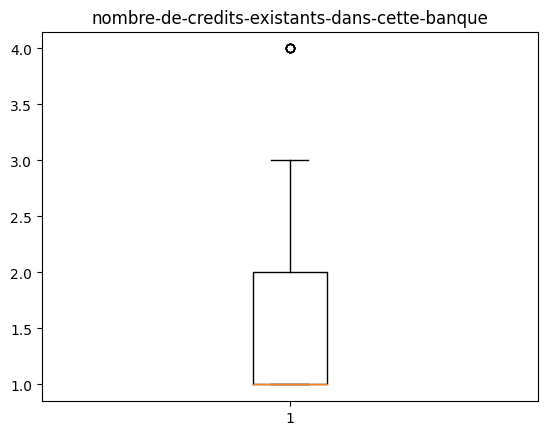

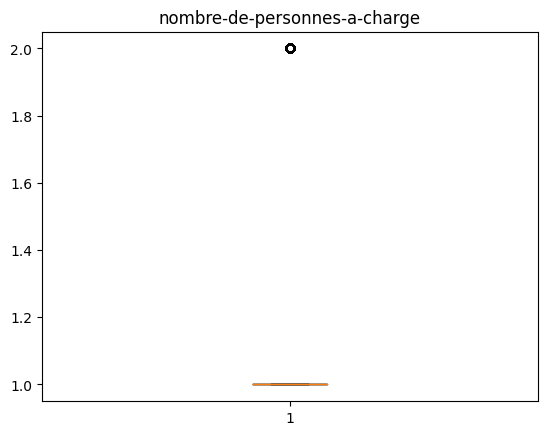

In [15]:
for title in numeric_variables.columns:
  #plt.figure(figsize = (2,2))
  plt.boxplot(numeric_variables[title])
  plt.title(title)
  plt.show()


Nous voyons l'existance de quelques valeurs qui peuvent être considérées comme des outliers, mais vu qu'il s'agit de données bancaires nous partons du postulat qu'il s'agit des clients atypiques.

Lorque nous supprimons ces outliers, le rappel de notre modèle baisse, il est dessous 0,35 jusqu'à atteindre la valeur de 0,00 avec un modèle SVM

### Selection des variables

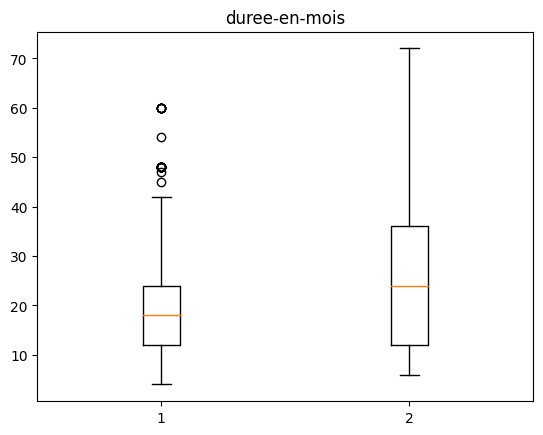

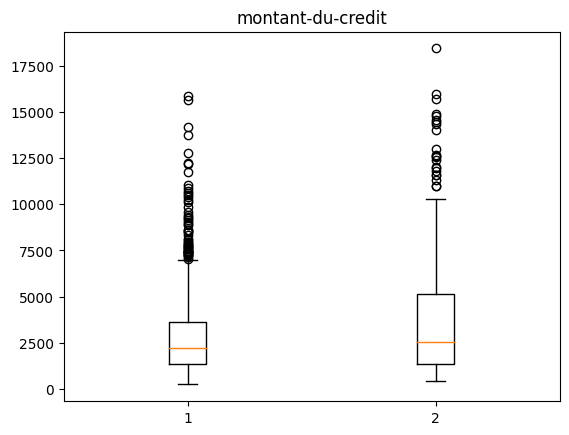

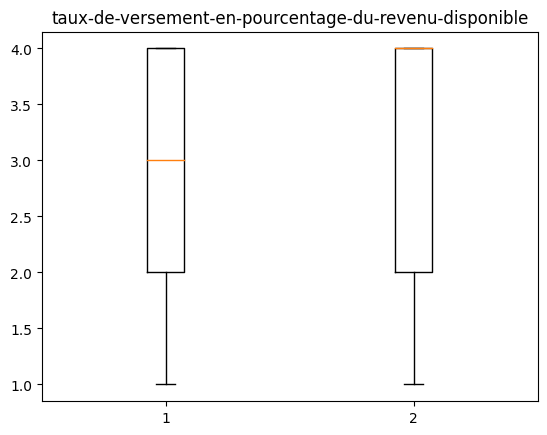

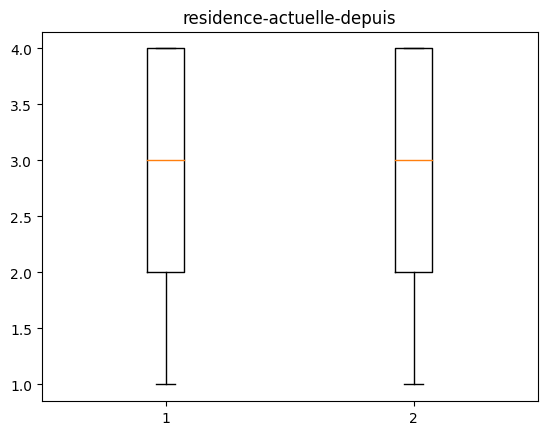

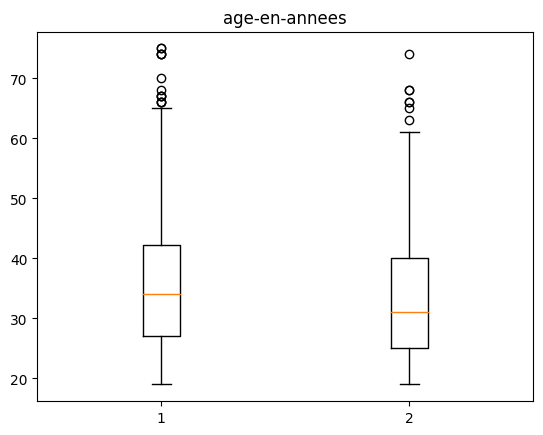

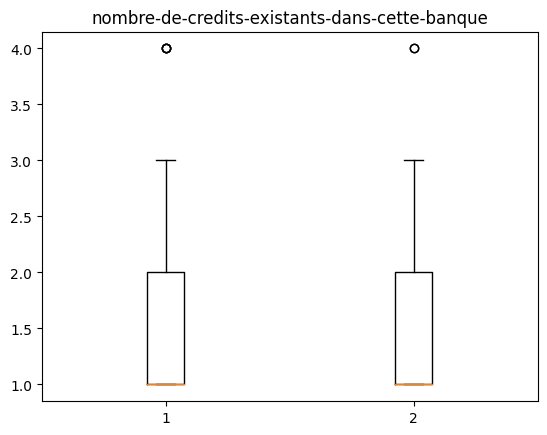

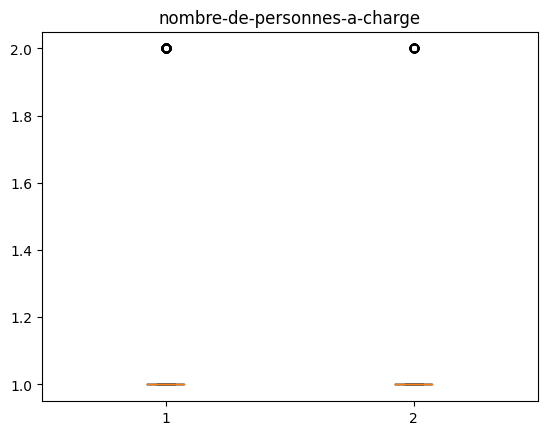

In [16]:
clean_df = data_with_column_name.copy()
for title in clean_df.select_dtypes(include=[np.number]).columns:
  plt.boxplot([clean_df[clean_df['y'] == '1'][title], clean_df[clean_df['y'] == '2'][title]], labels=['1', '2'])
  plt.title(title)
  plt.show()

En raison du nombre important de caractéristiques, nous sélectionnons des variables ayant une influence faible ou nulle sur le résultat de la classe :

*   Pas/peu d'influence : ["nombre-de-personnes-a-charge", "nombre-de-credits-existants-dans-cette-banque", "residence-actuelle-depuis"].



Conclusion :
- caractéristiques quantitatives pertinentes :
Toutes sauf ["nombre-de-personnes-a-charge", "nombre-de-credits-existants-dans-cette-banque", "residence-actuelle-depuis"], pour éviter le risque de surajustement, nous allons sélectionner un sous-ensemble de caractéristiques ayant le plus d'influence sur le résultat de la classe.

In [17]:
clean_numeric_variables = clean_df.select_dtypes(include=[np.number])

In [18]:
for title in ["nombre-de-personnes-a-charge", "nombre-de-credits-existants-dans-cette-banque", "residence-actuelle-depuis"]:
  clean_numeric_variables = clean_numeric_variables.drop(title, axis=1)

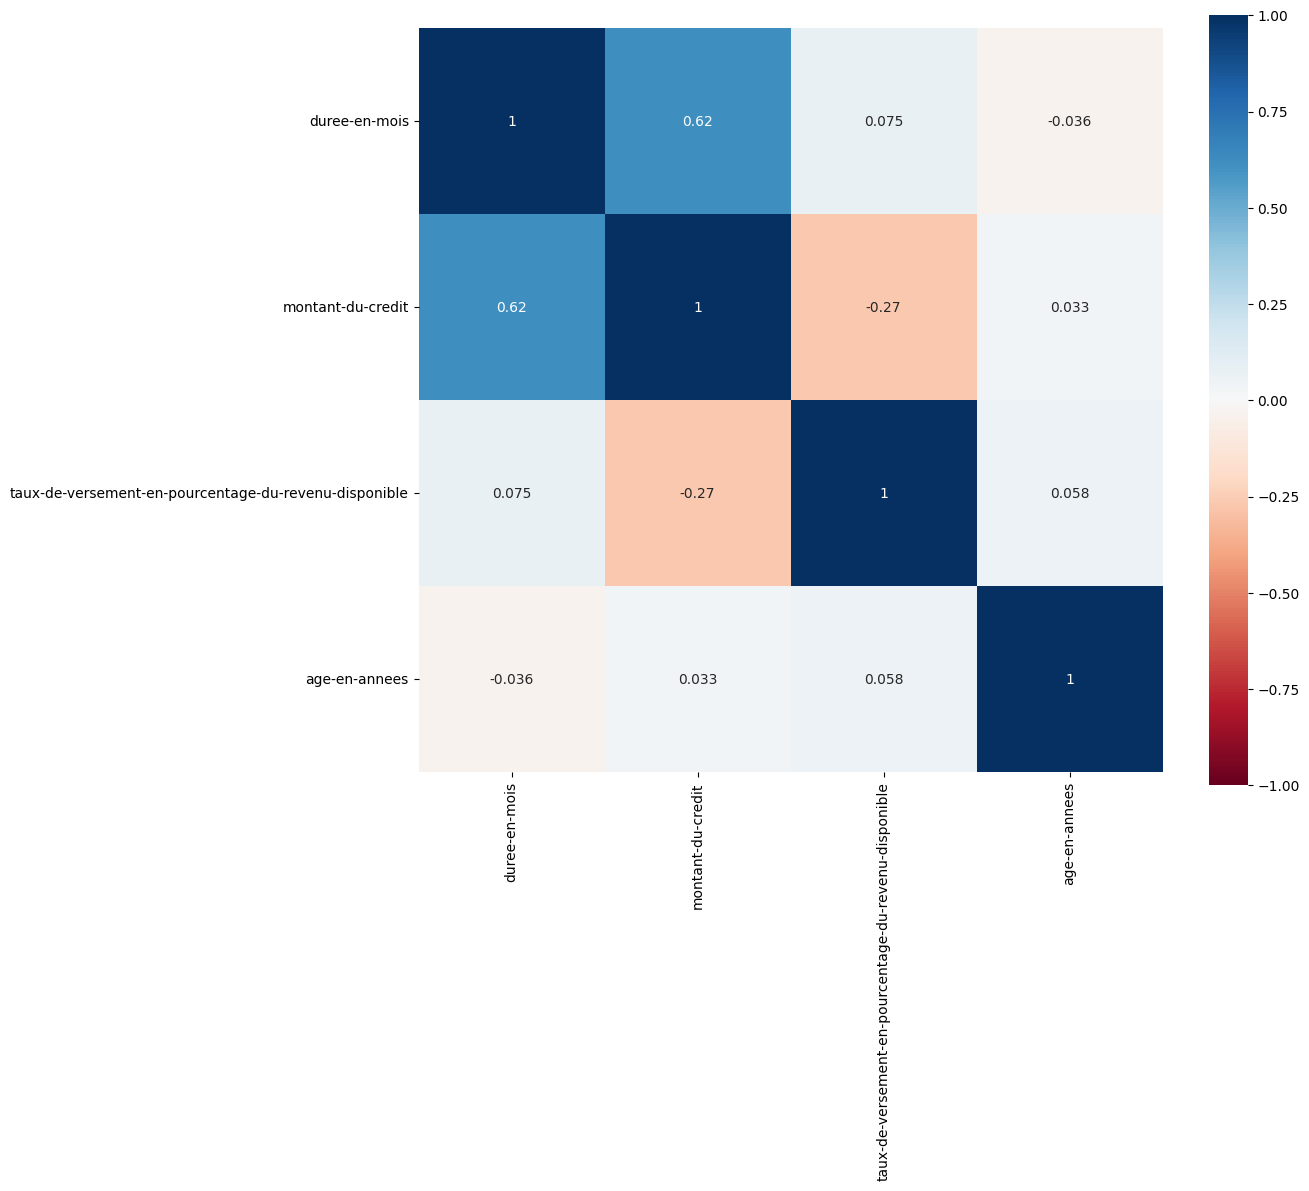

In [19]:
plt.figure(figsize = (12,10))
sns.heatmap(pd.DataFrame(clean_numeric_variables).corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

### Normalisation des données

In [20]:
clean_numeric_variables = StandardScaler().fit_transform(clean_numeric_variables)

In [21]:
pd.DataFrame(clean_numeric_variables).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


### Tableau de stockage des resultats de nos modèles

In [22]:
resutls_models = []

# 2. Techniques de classification supervisée

Nous allons utiliser les méthodes de classification suivantes :

*   Régression logistique
*   KNN
*   CART
*   GradientBoost
*   Random Forest
*   Bayesien Naïf
*   LDA
*   QDA
*   SVM

Notre but c'est de trouver les hyperparamètres pour chaque modèle qui nous permettent d'avoir les meilleurs résultats



Dans ce projet nous avons deux classes:

*   1 : "Bon client"
*   2 : "Mauvais client"

Donc la classe 1 correspond à notre classe négative et la classe 2 correspond à notre classe positif.
Le but de nos modèles est de minimiser les faux négatifs, nous allons ajuster notre modèle en nous basant en grand partie sur le *recall* et l'*AUC*.



Nous évaluons nos modèles par validation croisée et sur échantillon test

Dans premier temps nous utiliserons que les variables numériques

In [23]:
# Prepare Data

# Split-out validation dataset
#use only numerical data
X = clean_numeric_variables
Y = clean_df['y'].astype(int).values
Y = Y - 1
test_size = 0.25
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'

In [24]:
pd.DataFrame(Y_test).groupby(0).size()

0
0    185
1     65
dtype: int64

In [25]:
models = [
    {
        'model' : LogisticRegression(),
        'param_grid': {} #{"C": np.logspace(-3, 3, 7), "max_iter": [500, 700, 1000] }
    },
    {
        'model': KNeighborsClassifier(),
        'param_grid': {} #{'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}
    },
    {
        'model': DecisionTreeClassifier(),
        'param_grid': {} #{"min_samples_split": [2, 3, 4], "max_leaf_nodes": [None]+list(range(2, 100)), "max_depth":list(np.random.randint(1,20,size=5))}
    },
    {
        'model': RandomForestClassifier(),
        'param_grid': {} #{"n_estimators":list(np.random.randint(50,500,size=5)), "max_depth":list(np.random.randint(1,20,size=5))}
    },


    {
        'model': GradientBoostingClassifier(),
        'param_grid': {} #{"learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001],"n_estimators":[100,250,500,750,1000,1250,1500,1750]}
    },
    {
        'model': LinearDiscriminantAnalysis(),
        'param_grid': {}
    },

    {
        'model' : GaussianNB(),
        'param_grid': {}
    },
    {
        'model': SVC(probability=True),
        'param_grid': {} #{"C": [0.1, 1, 10, 100], "kernel": ["linear", "poly", "rbf", "sigmoid"], "degree": [3], "gamma": [1, 0.1, 0.01, 0.001]}
    },
    {
        'model' : QuadraticDiscriminantAnalysis(),
        'param_grid': {}
    }
]

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

### Helpers Functions

In [26]:
def trainModels(models, X_train, Y_train, X_test, Y_test, kfold):
  # Iterate over the models
  results = {}
  for model_info in models:
      model = model_info['model']
      param_grid = model_info['param_grid']

      # Create GridSearchCV object
      grid_search = GridSearchCV(model, param_grid, cv=kfold)

      # Fit the model on the training data
      grid_search.fit(X_train, Y_train)

      # Print the best hyperparameters and the corresponding accuracy
      print(f"Best hyperparameters for {model.__class__.__name__}: {grid_search.best_params_}")
      print(f"Best cross-validated accuracy: {grid_search.best_score_:.2f}")

      # Use the best model to make predictions on the test set
      y_pred = grid_search.best_estimator_.predict(X_test)
      y_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

      # Evaluate the accuracy of the best model on the test set
      # Calculate metrics
      precision, recall, f1_score, support = precision_recall_fscore_support(Y_test, y_pred, average="binary", pos_label=True)
      accuracy = accuracy_score(Y_test, y_pred)
      roc_auc = roc_auc_score(Y_test, y_proba)
      cm = confusion_matrix(Y_test, y_pred)
      results.update({
                      model: {"precision": precision,
                            "recall": recall,
                            "f1_score": f1_score,
                            "accuracy": accuracy,
                            "auc": roc_auc,
                            }
      })

      # Print the metrics
      print(classification_report(Y_test, y_pred))
      print(f"AUC: {roc_auc:.2f}")
      #sns.heatmap(cm, fmt=".0f", annot=True, cmap=plt.cm.Blues)
      #accuracy = np.trace(cm) / float(np.sum(cm))
      #misclass = 1 - accuracy
      #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
      #plt.show()
      fpr, tpr, thr = roc_curve(Y_test, y_proba)
      plt.plot(fpr, tpr, label="ROC Curve")
      plt.xlabel("FPR")
      plt.ylabel("TPR (recall)")
      close_zero = np.argmin(np.abs(thr))
      plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
      plt.legend(loc=4)
      plt.show()
      print("=" * 50)
  return results

### Training

Best hyperparameters for LogisticRegression: {}
Best cross-validated accuracy: 0.69
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       185
           1       0.50      0.17      0.25        65

    accuracy                           0.74       250
   macro avg       0.63      0.55      0.55       250
weighted avg       0.69      0.74      0.69       250

AUC: 0.64


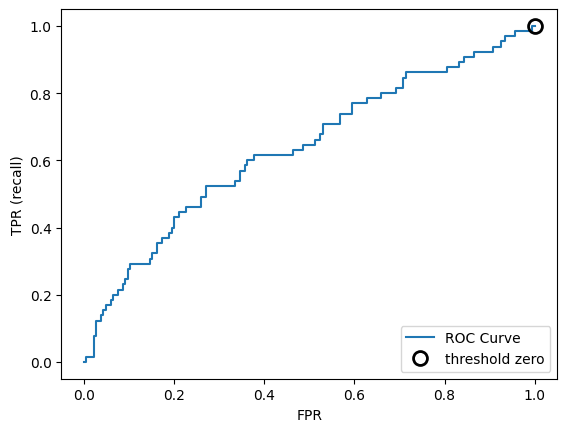

Best hyperparameters for KNeighborsClassifier: {}
Best cross-validated accuracy: 0.67
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       185
           1       0.39      0.29      0.33        65

    accuracy                           0.70       250
   macro avg       0.58      0.57      0.57       250
weighted avg       0.67      0.70      0.68       250

AUC: 0.58


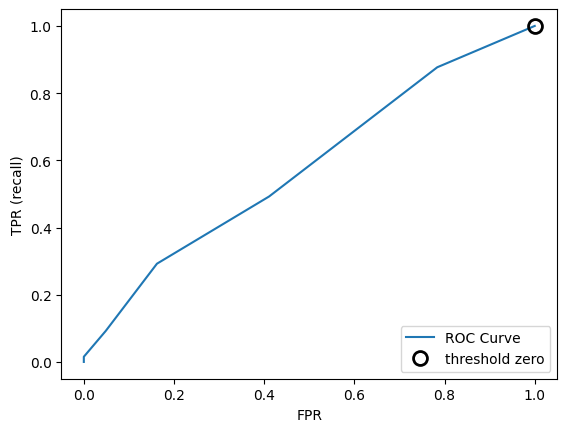

Best hyperparameters for DecisionTreeClassifier: {}
Best cross-validated accuracy: 0.61
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       185
           1       0.34      0.37      0.35        65

    accuracy                           0.65       250
   macro avg       0.55      0.56      0.56       250
weighted avg       0.66      0.65      0.65       250

AUC: 0.56


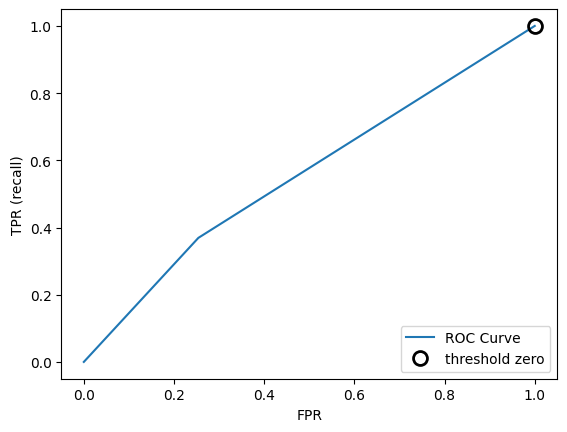

Best hyperparameters for RandomForestClassifier: {}
Best cross-validated accuracy: 0.66
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       185
           1       0.46      0.40      0.43        65

    accuracy                           0.72       250
   macro avg       0.63      0.62      0.62       250
weighted avg       0.71      0.72      0.71       250

AUC: 0.68


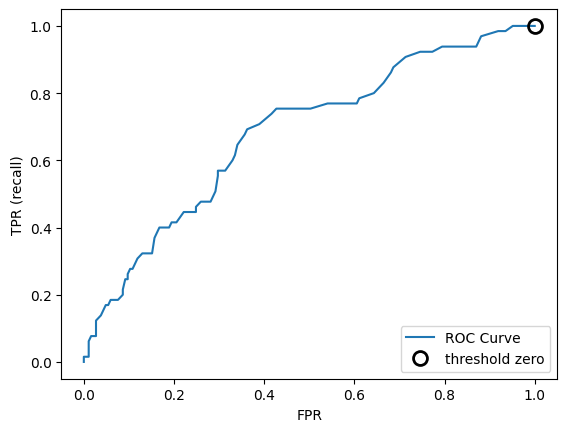

Best hyperparameters for GradientBoostingClassifier: {}
Best cross-validated accuracy: 0.68
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       185
           1       0.47      0.25      0.32        65

    accuracy                           0.73       250
   macro avg       0.62      0.57      0.58       250
weighted avg       0.69      0.73      0.70       250

AUC: 0.66


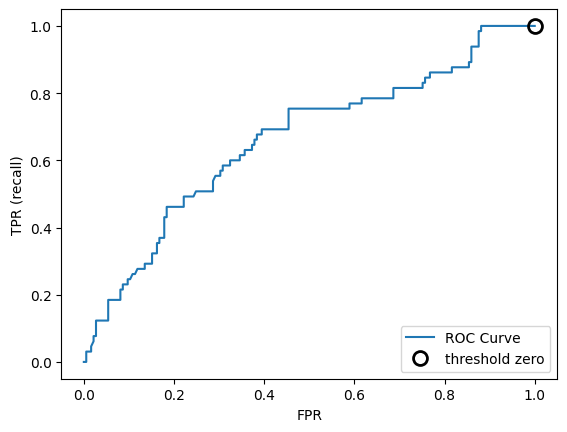

Best hyperparameters for LinearDiscriminantAnalysis: {}
Best cross-validated accuracy: 0.70
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       185
           1       0.50      0.17      0.25        65

    accuracy                           0.74       250
   macro avg       0.63      0.55      0.55       250
weighted avg       0.69      0.74      0.69       250

AUC: 0.63


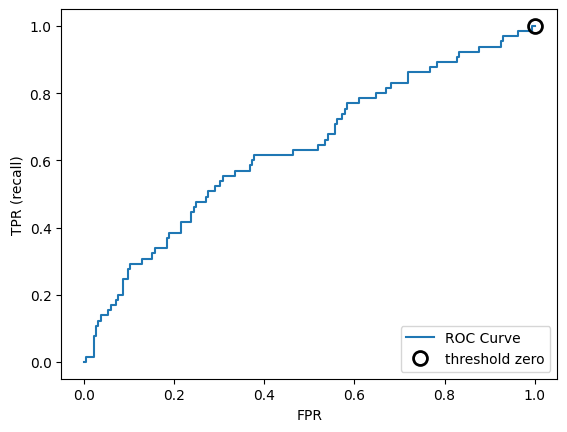

Best hyperparameters for GaussianNB: {}
Best cross-validated accuracy: 0.70
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       185
           1       0.46      0.28      0.35        65

    accuracy                           0.73       250
   macro avg       0.62      0.58      0.59       250
weighted avg       0.70      0.73      0.70       250

AUC: 0.64


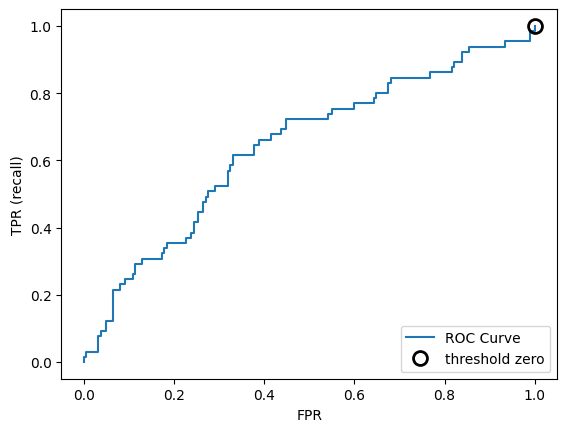

Best hyperparameters for SVC: {}
Best cross-validated accuracy: 0.71
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       185
           1       0.59      0.20      0.30        65

    accuracy                           0.76       250
   macro avg       0.68      0.58      0.58       250
weighted avg       0.72      0.76      0.71       250

AUC: 0.62


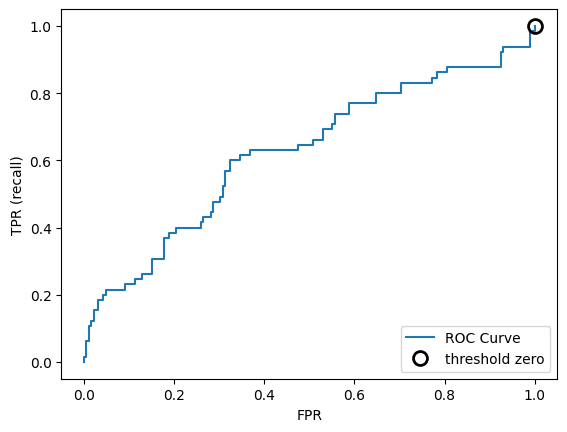

Best hyperparameters for QuadraticDiscriminantAnalysis: {}
Best cross-validated accuracy: 0.69
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       185
           1       0.42      0.26      0.32        65

    accuracy                           0.72       250
   macro avg       0.60      0.57      0.57       250
weighted avg       0.68      0.72      0.69       250

AUC: 0.66


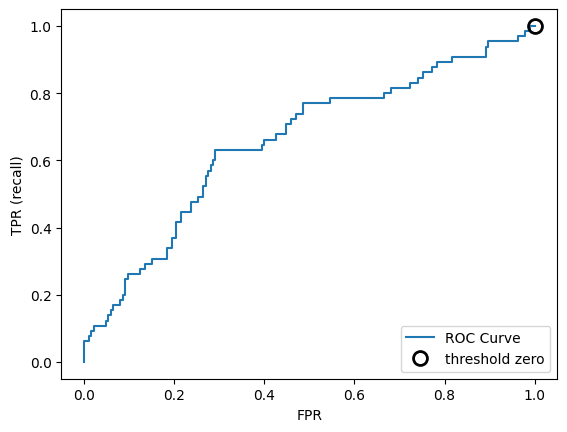

In [27]:
r = {"numeric": trainModels(models, X_train, Y_train, X_test, Y_test, kfold)}

In [28]:
resutls_models.append(r)

### Ajout des variables catégorielles

Nous utilisons l'encodage one-hot pour ajouter nos variables catégorielles à notre data.
Notre but, c'est qu'avec plus de variables nos modèles améliorent leurs généralisations

Nous allons supprimer la variable catégorielle telephone car selon nous elle n'apporte aucune information

In [29]:
clean_object_variables = clean_df
for title in ["nombre-de-personnes-a-charge", "nombre-de-credits-existants-dans-cette-banque", "residence-actuelle-depuis", "telephone", "y"]:
  clean_object_variables = clean_object_variables.drop(title, axis=1)

In [30]:
dummy_df = pd.get_dummies(clean_object_variables)

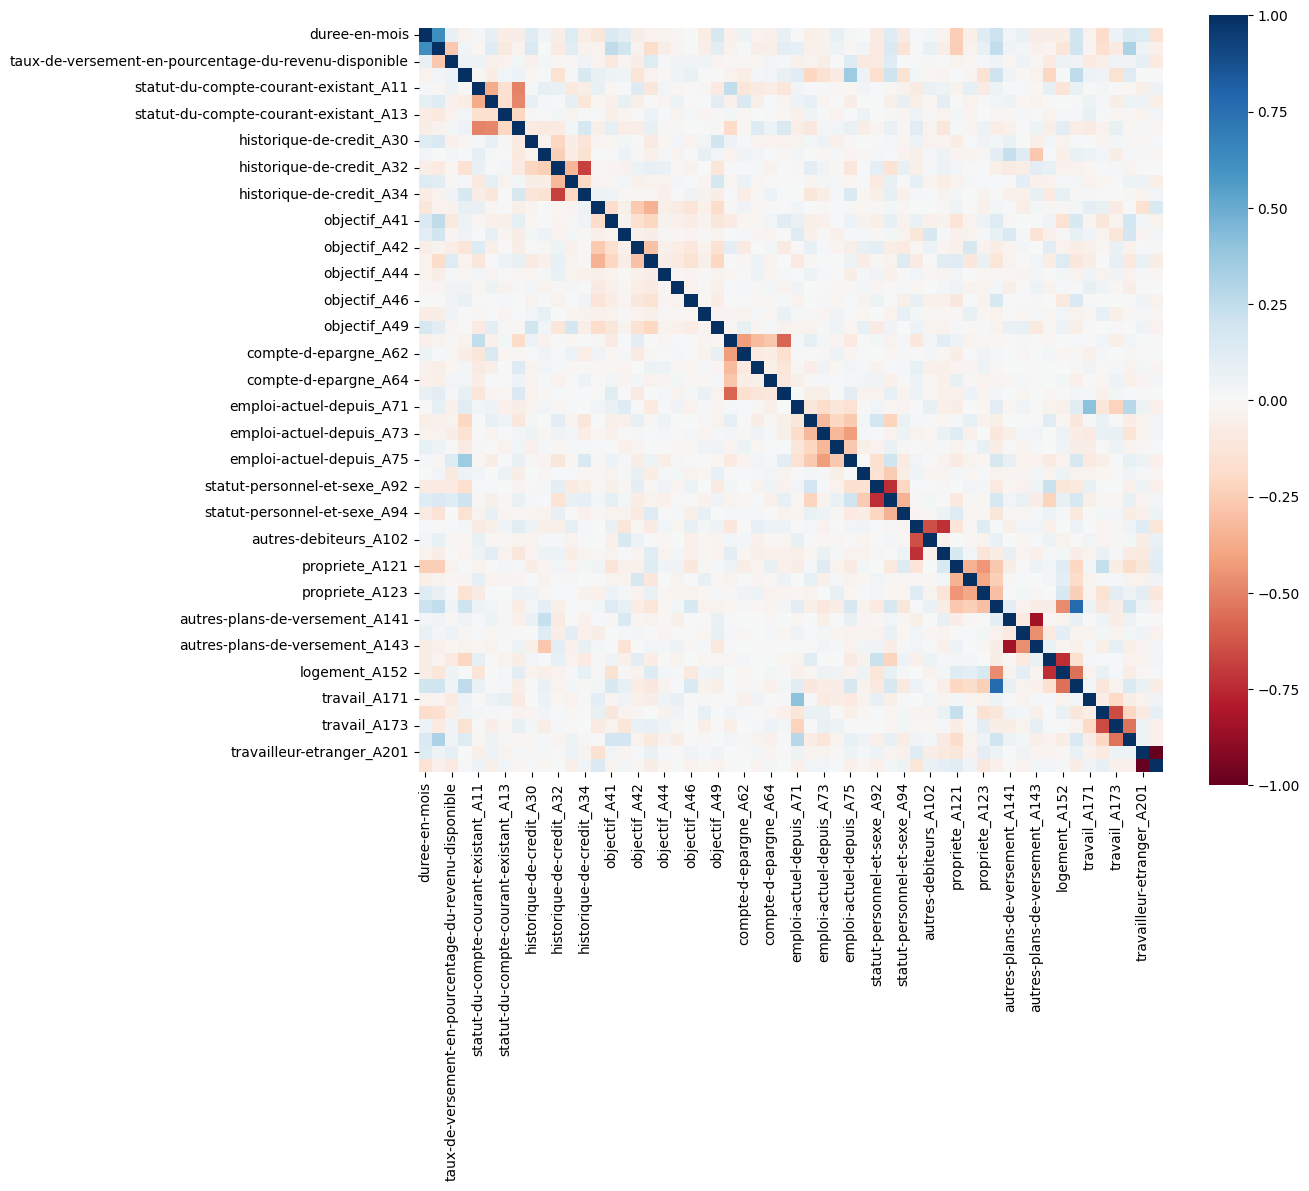

In [31]:
plt.figure(figsize = (12,10))
sns.heatmap(pd.DataFrame(dummy_df).corr(), square=True, annot=False, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

In [32]:
dummy_df = StandardScaler().fit_transform(dummy_df)

### Notre dataset

In [33]:
# Prepare Data

# Split-out validation dataset
#use only numerical data
X = dummy_df
Y = clean_df['y'].astype(int).values
Y = Y - 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

### Training

Best hyperparameters for LogisticRegression: {}
Best cross-validated accuracy: 0.73
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       185
           1       0.65      0.52      0.58        65

    accuracy                           0.80       250
   macro avg       0.75      0.71      0.73       250
weighted avg       0.79      0.80      0.80       250

AUC: 0.81


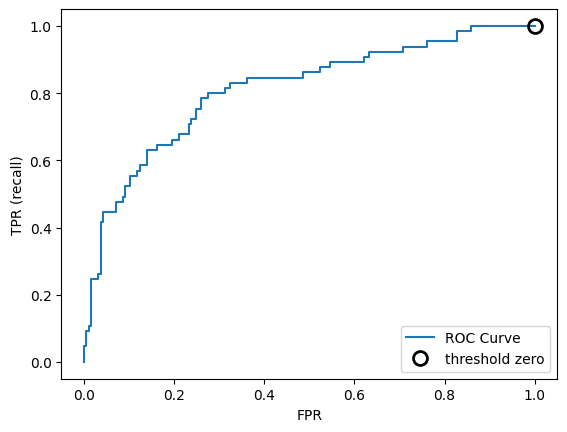

Best hyperparameters for KNeighborsClassifier: {}
Best cross-validated accuracy: 0.69
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       185
           1       0.62      0.40      0.49        65

    accuracy                           0.78       250
   macro avg       0.72      0.66      0.67       250
weighted avg       0.76      0.78      0.76       250

AUC: 0.73


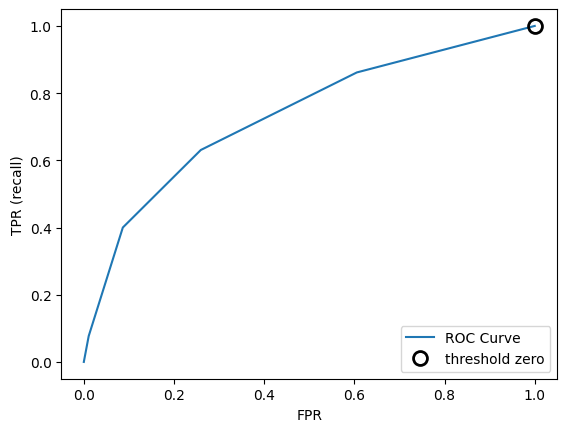

Best hyperparameters for DecisionTreeClassifier: {}
Best cross-validated accuracy: 0.66
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       185
           1       0.47      0.54      0.50        65

    accuracy                           0.72       250
   macro avg       0.65      0.66      0.65       250
weighted avg       0.73      0.72      0.73       250

AUC: 0.66


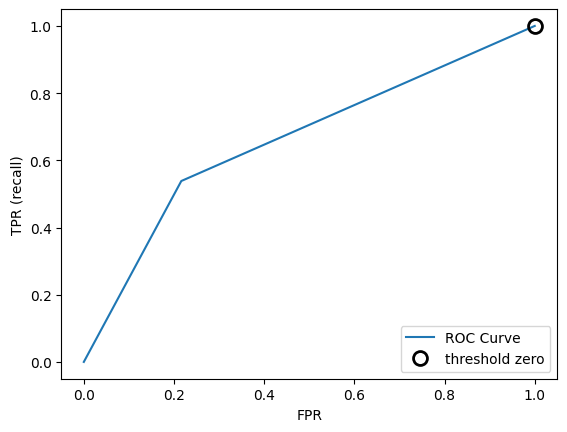

Best hyperparameters for RandomForestClassifier: {}
Best cross-validated accuracy: 0.75
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       185
           1       0.67      0.46      0.55        65

    accuracy                           0.80       250
   macro avg       0.75      0.69      0.71       250
weighted avg       0.79      0.80      0.79       250

AUC: 0.83


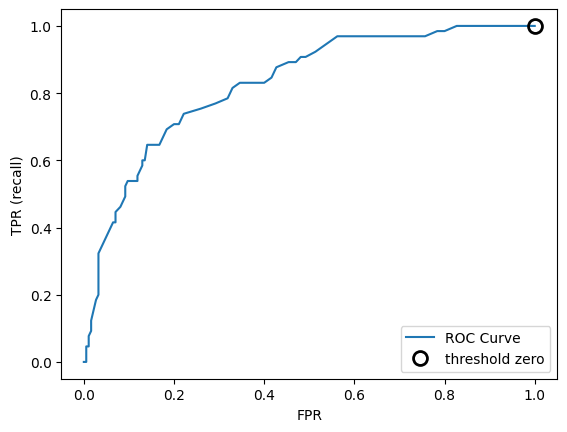

Best hyperparameters for GradientBoostingClassifier: {}
Best cross-validated accuracy: 0.73
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       185
           1       0.62      0.46      0.53        65

    accuracy                           0.79       250
   macro avg       0.73      0.68      0.70       250
weighted avg       0.77      0.79      0.78       250

AUC: 0.81


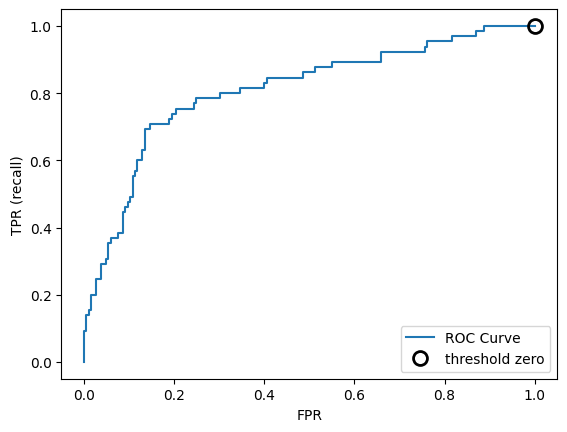

Best hyperparameters for LinearDiscriminantAnalysis: {}
Best cross-validated accuracy: 0.73
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       185
           1       0.64      0.54      0.58        65

    accuracy                           0.80       250
   macro avg       0.74      0.72      0.73       250
weighted avg       0.79      0.80      0.79       250

AUC: 0.81


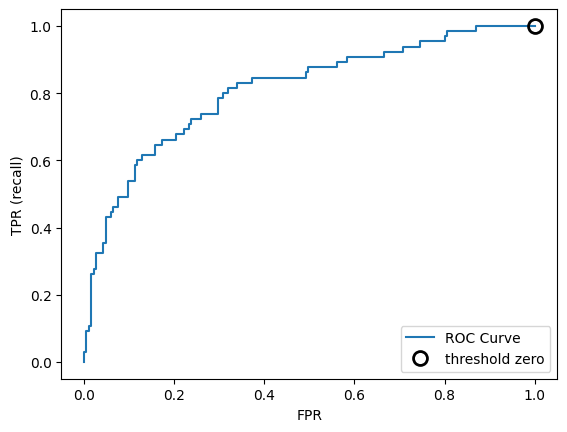

Best hyperparameters for GaussianNB: {}
Best cross-validated accuracy: 0.63
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       185
           1       0.51      0.74      0.60        65

    accuracy                           0.75       250
   macro avg       0.70      0.74      0.71       250
weighted avg       0.79      0.75      0.76       250

AUC: 0.80


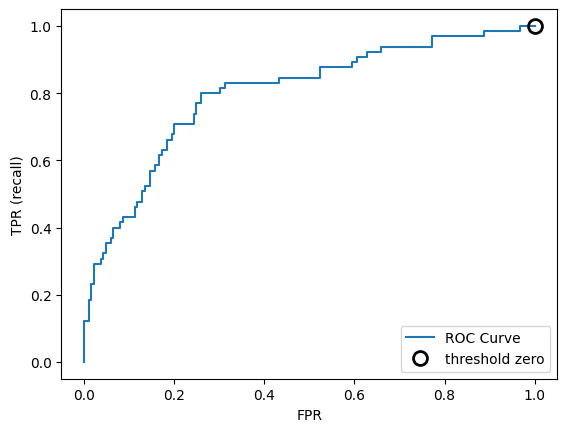

Best hyperparameters for SVC: {}
Best cross-validated accuracy: 0.74
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       185
           1       0.76      0.40      0.53        65

    accuracy                           0.81       250
   macro avg       0.79      0.68      0.70       250
weighted avg       0.81      0.81      0.79       250

AUC: 0.82


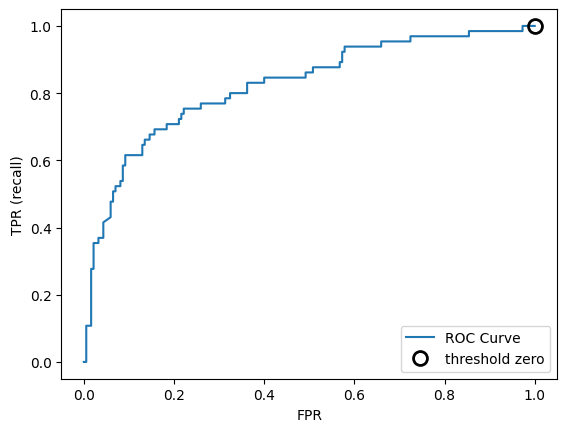

Best hyperparameters for QuadraticDiscriminantAnalysis: {}
Best cross-validated accuracy: 0.55
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       185
           1       0.42      0.45      0.43        65

    accuracy                           0.70       250
   macro avg       0.61      0.61      0.61       250
weighted avg       0.70      0.70      0.70       250

AUC: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


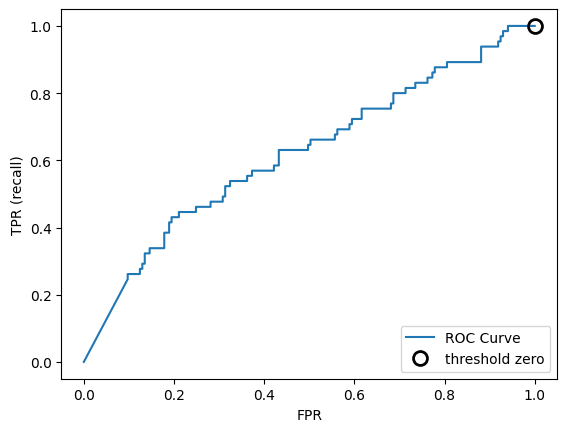

In [34]:
r = {"categorial": trainModels(models, X_train, Y_train, X_test, Y_test, kfold)}

In [35]:
resutls_models.append(r)

# Sampling

Aucun de nos modèle nous fournit des performances satisfaisante, ils n'arrive pas à minimiser les faux négatifs.

Cela est dû au désiquilibre de nos données, la classe 1 est présente 70% de nos données.

Pour réquilibré nos données et améliorer nos modèles nous allons utiliser 3 techniques de sampling:


*   Over-sampling
*   Under-sampling
*   Combinaison de Over-sampling et Under-sampling



Les données que nous allons équilibré sont ceux du train (X_train et Y_train), nous ne toucherons pas aux données de tests

## Over-sampling

In [36]:
#over sample data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, Y_train)

In [37]:
print(pd.DataFrame(y_resampled).groupby(0).size())

0
0    515
1    515
dtype: int64


### Training

Best hyperparameters for LogisticRegression: {}
Best cross-validated accuracy: 0.73
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       185
           1       0.51      0.72      0.60        65

    accuracy                           0.75       250
   macro avg       0.70      0.74      0.71       250
weighted avg       0.79      0.75      0.76       250

AUC: 0.81


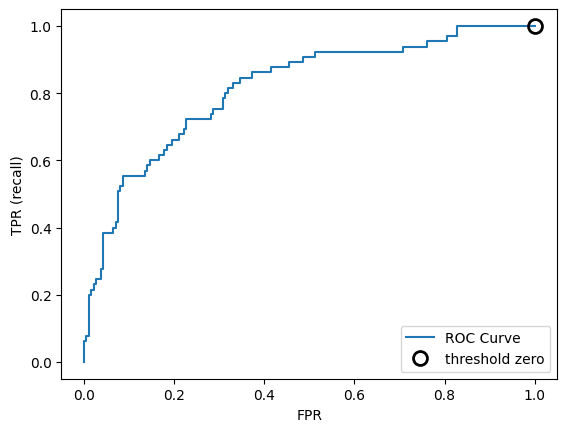

Best hyperparameters for KNeighborsClassifier: {}
Best cross-validated accuracy: 0.71
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       185
           1       0.42      0.58      0.49        65

    accuracy                           0.68       250
   macro avg       0.62      0.65      0.63       250
weighted avg       0.72      0.68      0.69       250

AUC: 0.69


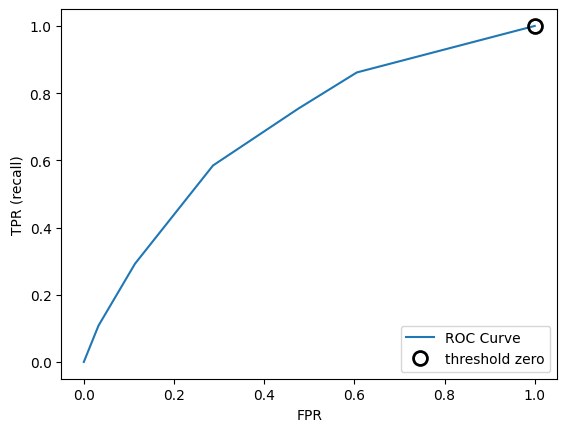

Best hyperparameters for DecisionTreeClassifier: {}
Best cross-validated accuracy: 0.81
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       185
           1       0.42      0.51      0.46        65

    accuracy                           0.69       250
   macro avg       0.62      0.63      0.62       250
weighted avg       0.71      0.69      0.70       250

AUC: 0.63


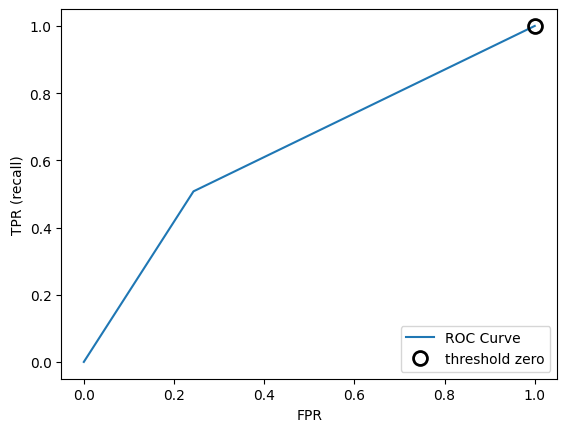

Best hyperparameters for RandomForestClassifier: {}
Best cross-validated accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       185
           1       0.62      0.54      0.58        65

    accuracy                           0.80       250
   macro avg       0.74      0.71      0.72       250
weighted avg       0.79      0.80      0.79       250

AUC: 0.84


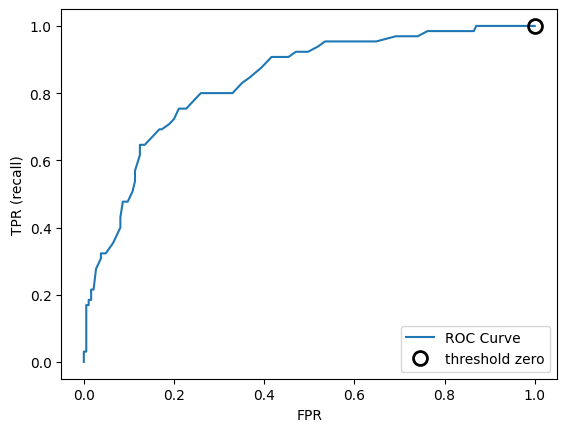

Best hyperparameters for GradientBoostingClassifier: {}
Best cross-validated accuracy: 0.78
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       185
           1       0.58      0.71      0.64        65

    accuracy                           0.79       250
   macro avg       0.74      0.76      0.75       250
weighted avg       0.81      0.79      0.80       250

AUC: 0.81


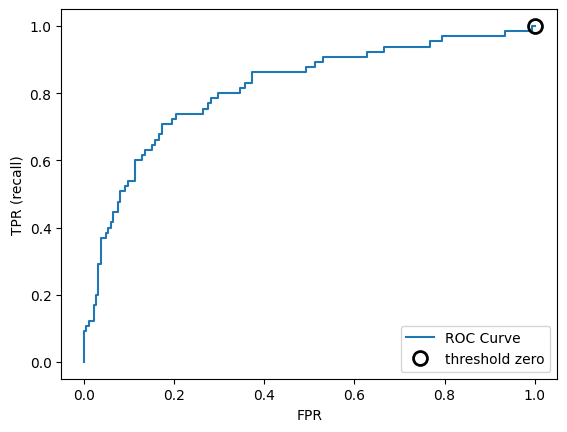

Best hyperparameters for LinearDiscriminantAnalysis: {}
Best cross-validated accuracy: 0.73
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       185
           1       0.52      0.74      0.61        65

    accuracy                           0.75       250
   macro avg       0.70      0.75      0.71       250
weighted avg       0.79      0.75      0.76       250

AUC: 0.82


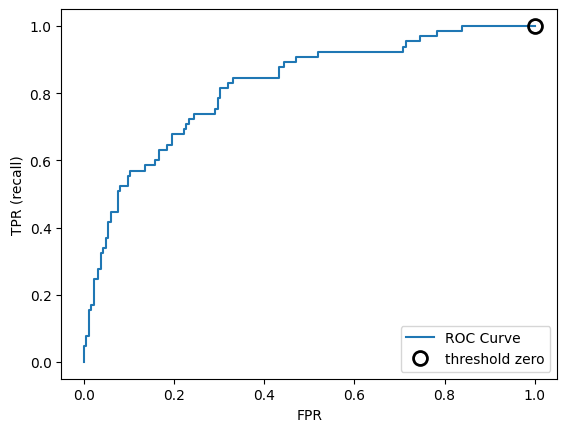

Best hyperparameters for GaussianNB: {}
Best cross-validated accuracy: 0.70
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       185
           1       0.49      0.77      0.60        65

    accuracy                           0.73       250
   macro avg       0.69      0.74      0.70       250
weighted avg       0.79      0.73      0.75       250

AUC: 0.80


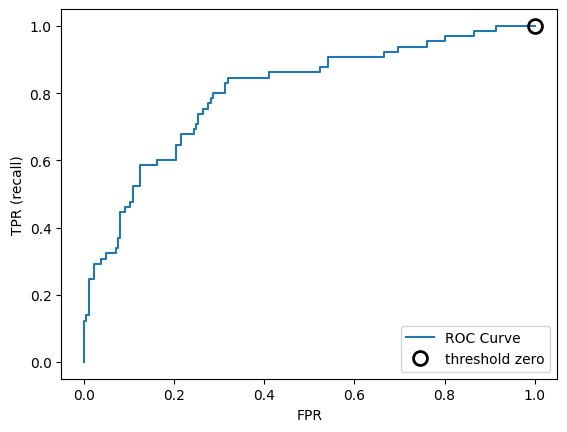

Best hyperparameters for SVC: {}
Best cross-validated accuracy: 0.80
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       185
           1       0.58      0.65      0.61        65

    accuracy                           0.78       250
   macro avg       0.72      0.74      0.73       250
weighted avg       0.79      0.78      0.79       250

AUC: 0.81


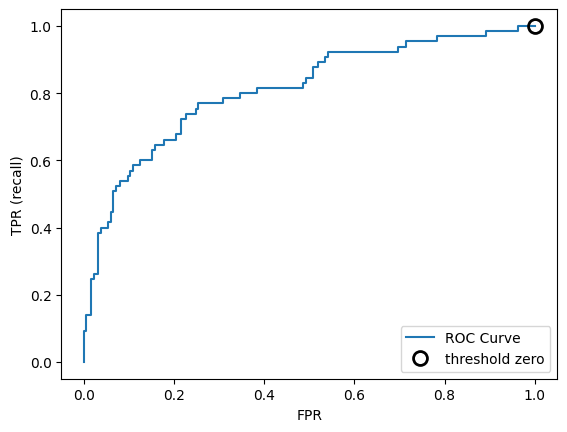

Best hyperparameters for QuadraticDiscriminantAnalysis: {}
Best cross-validated accuracy: 0.59
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       185
           1       0.34      0.57      0.43        65

    accuracy                           0.60       250
   macro avg       0.57      0.59      0.56       250
weighted avg       0.68      0.60      0.63       250

AUC: 0.68


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


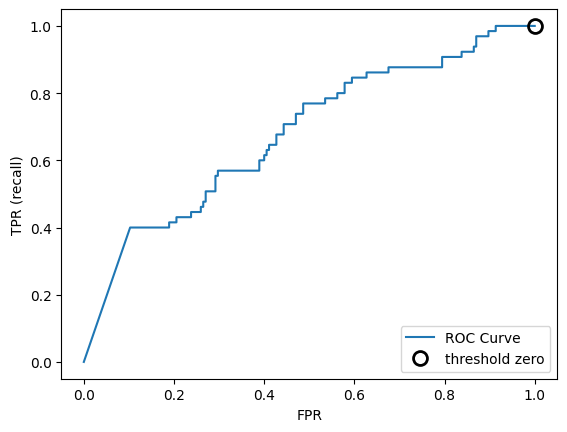

In [38]:
r = {"over-sampling" : trainModels(models, X_resampled, y_resampled, X_test, Y_test, kfold)}

In [39]:
resutls_models.append(r)

## Under-sampling

In [40]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)

In [41]:
print(pd.DataFrame(y_resampled).groupby(0).size())

0
0    235
1    235
dtype: int64


### Training

Best hyperparameters for LogisticRegression: {}
Best cross-validated accuracy: 0.70
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       185
           1       0.49      0.77      0.60        65

    accuracy                           0.73       250
   macro avg       0.69      0.74      0.70       250
weighted avg       0.79      0.73      0.74       250

AUC: 0.81


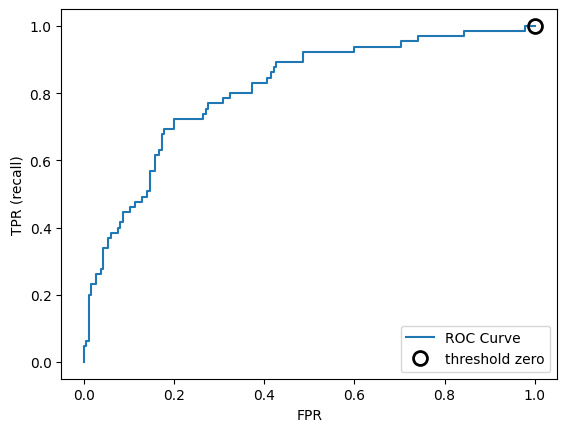

Best hyperparameters for KNeighborsClassifier: {}
Best cross-validated accuracy: 0.65
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       185
           1       0.44      0.65      0.52        65

    accuracy                           0.69       250
   macro avg       0.64      0.68      0.65       250
weighted avg       0.74      0.69      0.71       250

AUC: 0.71


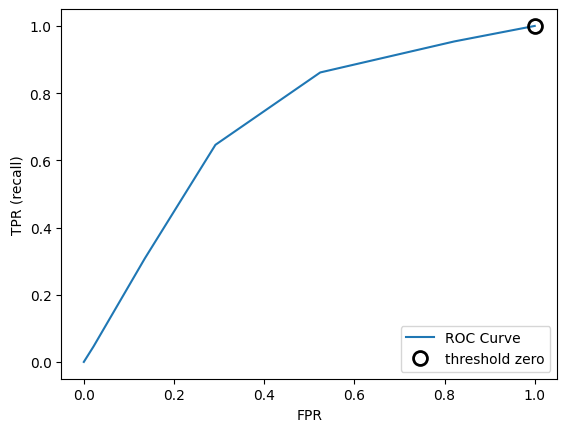

Best hyperparameters for DecisionTreeClassifier: {}
Best cross-validated accuracy: 0.60
              precision    recall  f1-score   support

           0       0.89      0.63      0.73       185
           1       0.42      0.77      0.54        65

    accuracy                           0.66       250
   macro avg       0.65      0.70      0.64       250
weighted avg       0.76      0.66      0.68       250

AUC: 0.70


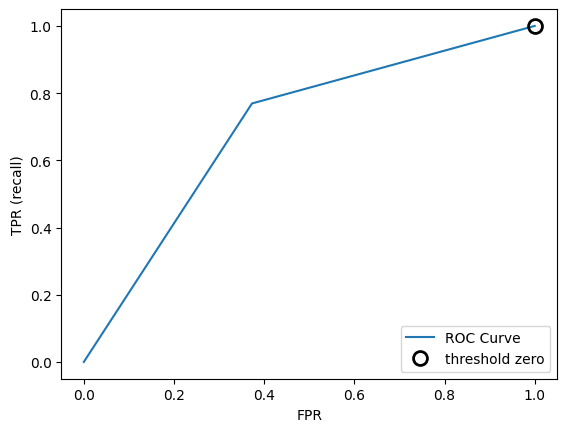

Best hyperparameters for RandomForestClassifier: {}
Best cross-validated accuracy: 0.69
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       185
           1       0.53      0.77      0.63        65

    accuracy                           0.76       250
   macro avg       0.72      0.77      0.73       250
weighted avg       0.81      0.76      0.78       250

AUC: 0.82


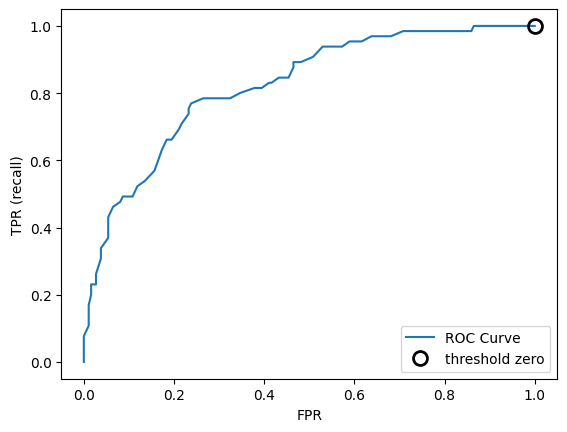

Best hyperparameters for GradientBoostingClassifier: {}
Best cross-validated accuracy: 0.67
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       185
           1       0.49      0.78      0.60        65

    accuracy                           0.73       250
   macro avg       0.69      0.75      0.70       250
weighted avg       0.79      0.73      0.74       250

AUC: 0.79


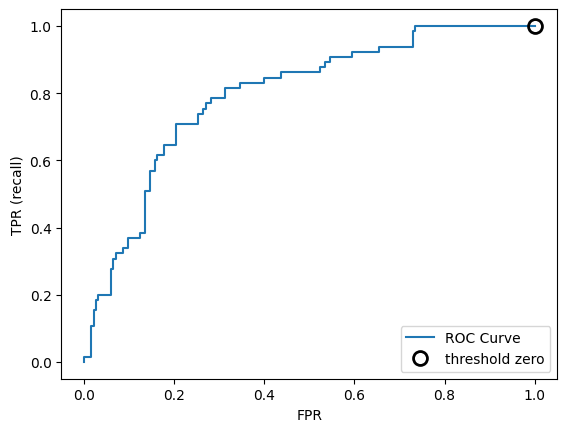

Best hyperparameters for LinearDiscriminantAnalysis: {}
Best cross-validated accuracy: 0.70
              precision    recall  f1-score   support

           0       0.90      0.70      0.78       185
           1       0.47      0.77      0.58        65

    accuracy                           0.72       250
   macro avg       0.68      0.73      0.68       250
weighted avg       0.79      0.72      0.73       250

AUC: 0.81


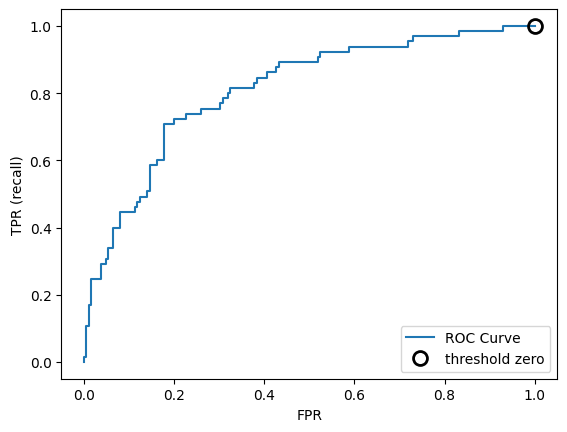

Best hyperparameters for GaussianNB: {}
Best cross-validated accuracy: 0.64
              precision    recall  f1-score   support

           0       0.92      0.63      0.75       185
           1       0.44      0.85      0.58        65

    accuracy                           0.68       250
   macro avg       0.68      0.74      0.66       250
weighted avg       0.80      0.68      0.70       250

AUC: 0.79


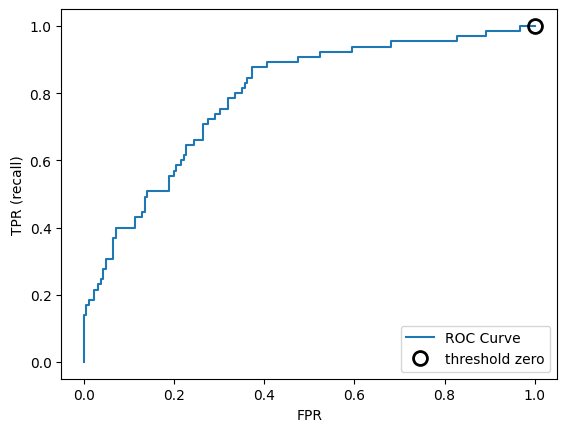

Best hyperparameters for SVC: {}
Best cross-validated accuracy: 0.70
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       185
           1       0.50      0.78      0.61        65

    accuracy                           0.74       250
   macro avg       0.71      0.76      0.71       250
weighted avg       0.80      0.74      0.76       250

AUC: 0.81


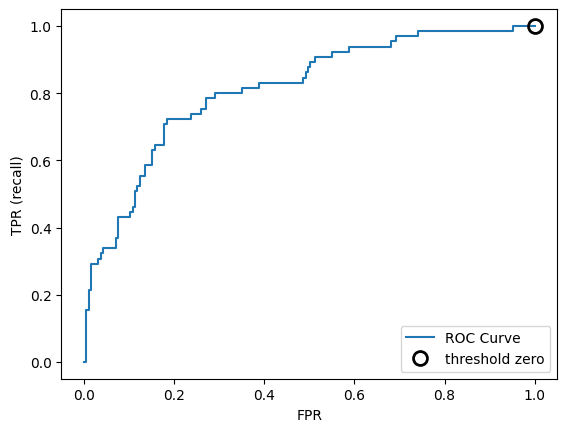

Best hyperparameters for QuadraticDiscriminantAnalysis: {}
Best cross-validated accuracy: 0.58
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       185
           1       0.44      0.28      0.34        65

    accuracy                           0.72       250
   macro avg       0.61      0.58      0.58       250
weighted avg       0.69      0.72      0.70       250

AUC: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


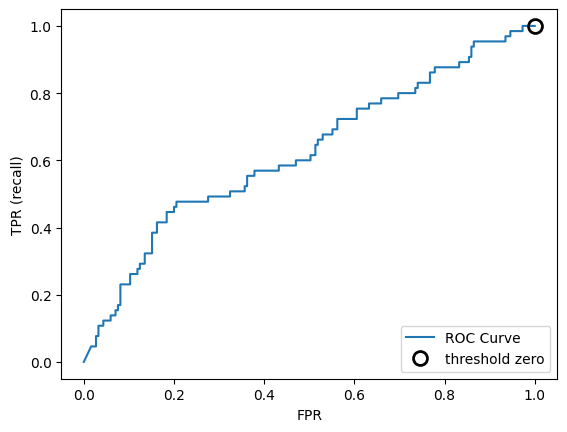

In [42]:
r = {"under-sampling": trainModels(models, X_resampled, y_resampled, X_test, Y_test, kfold)}

In [43]:
resutls_models.append(r)

## Combination of over- and under-sampling

In [44]:
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, Y_train)

In [45]:
print(pd.DataFrame(y_resampled).groupby(0).size())

0
0    221
1    356
dtype: int64


### Training

Best hyperparameters for LogisticRegression: {}
Best cross-validated accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       185
           1       0.48      0.83      0.61        65

    accuracy                           0.72       250
   macro avg       0.70      0.76      0.69       250
weighted avg       0.80      0.72      0.74       250

AUC: 0.80


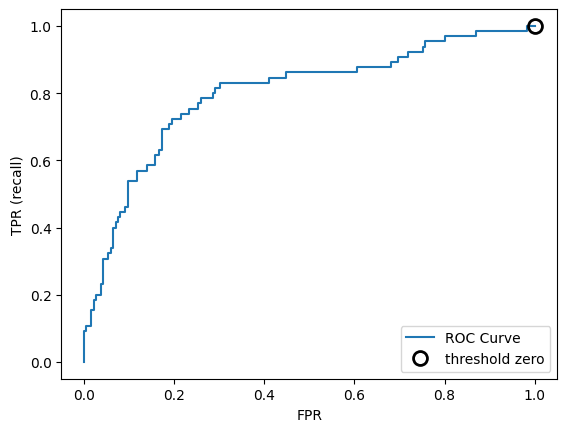

Best hyperparameters for KNeighborsClassifier: {}
Best cross-validated accuracy: 0.93
              precision    recall  f1-score   support

           0       0.90      0.61      0.73       185
           1       0.42      0.82      0.56        65

    accuracy                           0.66       250
   macro avg       0.66      0.71      0.64       250
weighted avg       0.78      0.66      0.68       250

AUC: 0.74


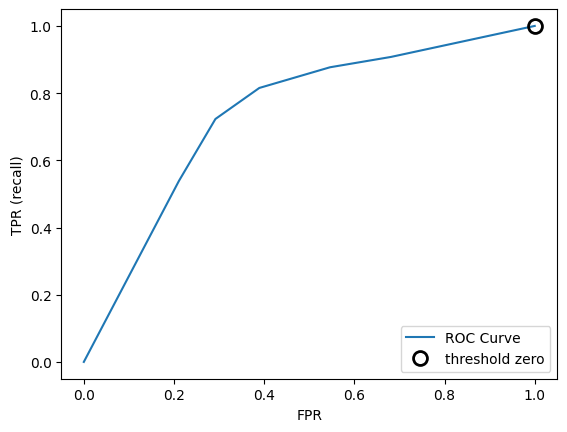

Best hyperparameters for DecisionTreeClassifier: {}
Best cross-validated accuracy: 0.89
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       185
           1       0.43      0.69      0.53        65

    accuracy                           0.68       250
   macro avg       0.65      0.69      0.65       250
weighted avg       0.75      0.68      0.70       250

AUC: 0.69


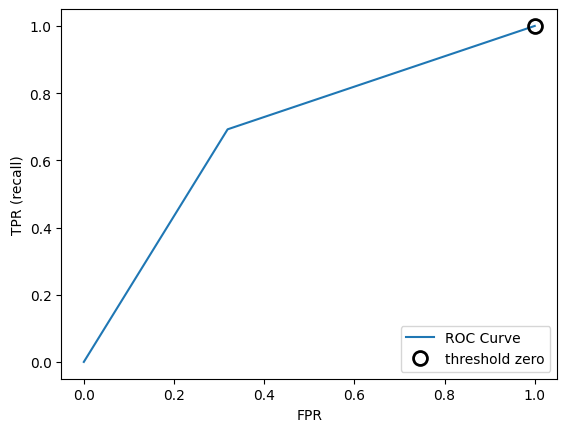

Best hyperparameters for RandomForestClassifier: {}
Best cross-validated accuracy: 0.93
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       185
           1       0.50      0.78      0.61        65

    accuracy                           0.74       250
   macro avg       0.70      0.75      0.70       250
weighted avg       0.80      0.74      0.75       250

AUC: 0.82


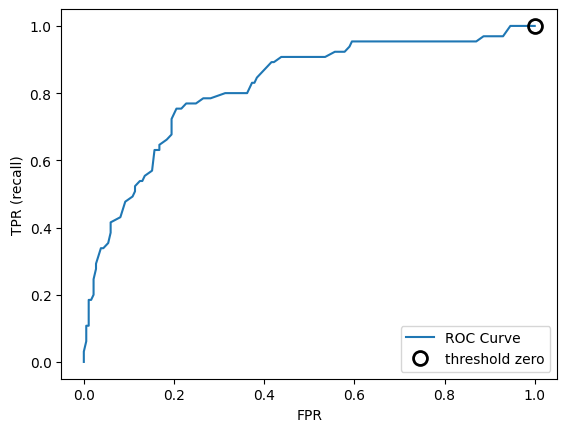

Best hyperparameters for GradientBoostingClassifier: {}
Best cross-validated accuracy: 0.91
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       185
           1       0.51      0.82      0.63        65

    accuracy                           0.75       250
   macro avg       0.72      0.77      0.72       250
weighted avg       0.81      0.75      0.77       250

AUC: 0.82


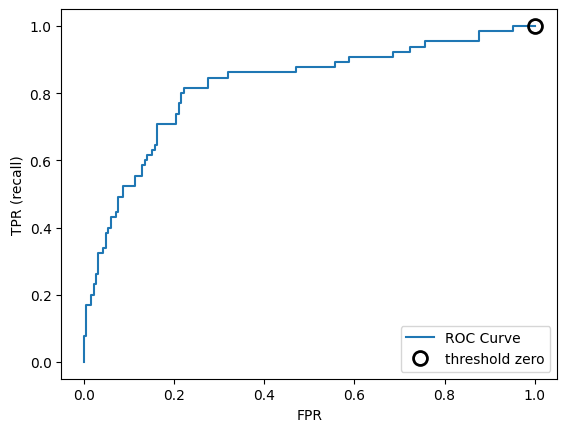

Best hyperparameters for LinearDiscriminantAnalysis: {}
Best cross-validated accuracy: 0.92
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       185
           1       0.45      0.83      0.58        65

    accuracy                           0.69       250
   macro avg       0.68      0.73      0.67       250
weighted avg       0.79      0.69      0.71       250

AUC: 0.79


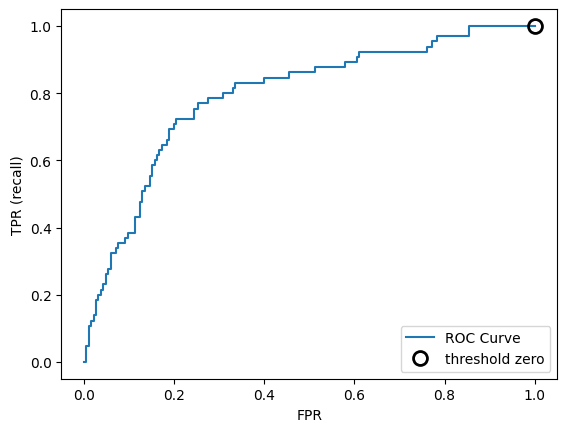

Best hyperparameters for GaussianNB: {}
Best cross-validated accuracy: 0.66
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       185
           1       0.45      0.45      0.45        65

    accuracy                           0.72       250
   macro avg       0.63      0.63      0.63       250
weighted avg       0.71      0.72      0.72       250

AUC: 0.74


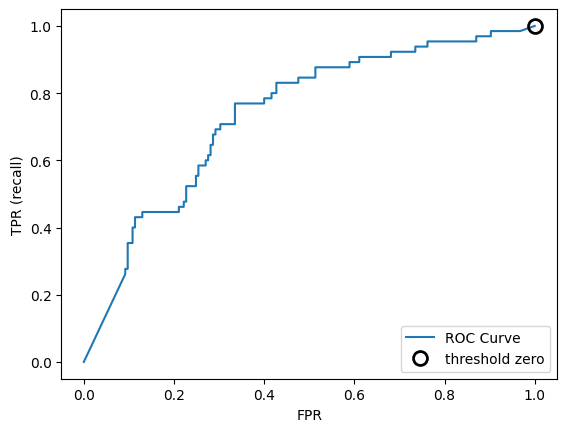

Best hyperparameters for SVC: {}
Best cross-validated accuracy: 0.95
              precision    recall  f1-score   support

           0       0.91      0.74      0.81       185
           1       0.51      0.78      0.62        65

    accuracy                           0.75       250
   macro avg       0.71      0.76      0.72       250
weighted avg       0.80      0.75      0.76       250

AUC: 0.80


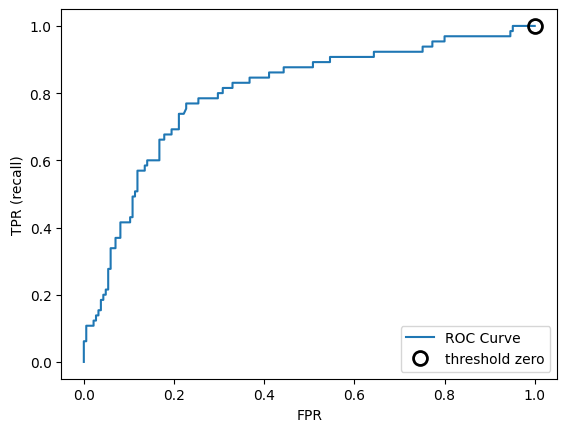

Best hyperparameters for QuadraticDiscriminantAnalysis: {}
Best cross-validated accuracy: 0.64
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       185
           1       0.46      0.63      0.53        65

    accuracy                           0.71       250
   macro avg       0.66      0.69      0.66       250
weighted avg       0.75      0.71      0.72       250

AUC: 0.73


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


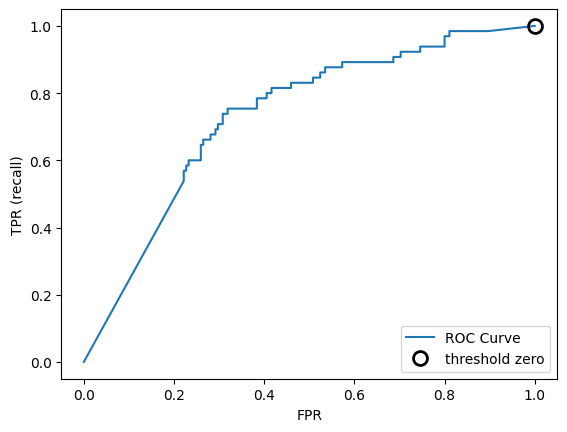

In [46]:
r = {"combination" : trainModels(models, X_resampled, y_resampled, X_test, Y_test, kfold)}

In [47]:
resutls_models.append(r)

# 3. Comparaison de l'ensemble des modèles

|                                    numeric                                     |


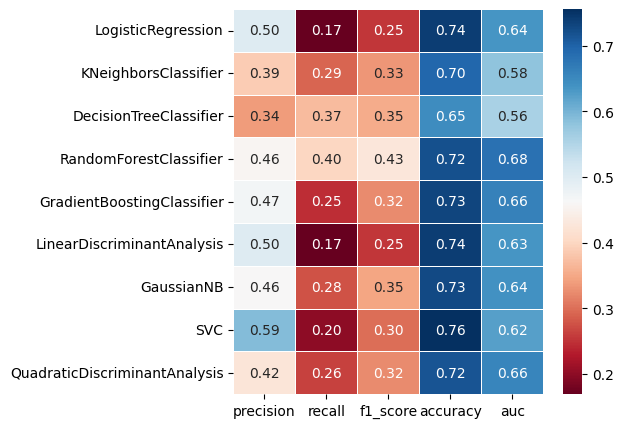




|                                   categorial                                   |


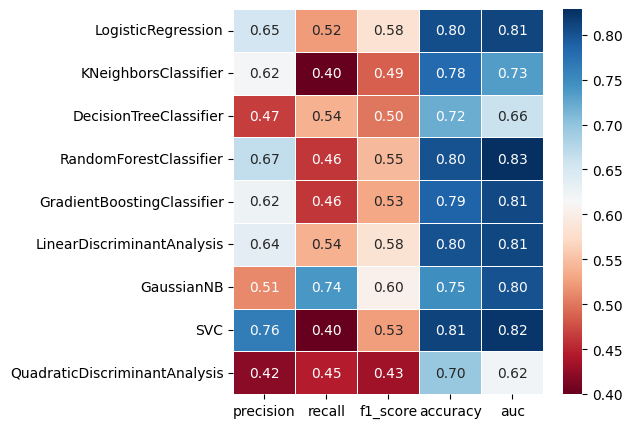




|                                 over-sampling                                  |


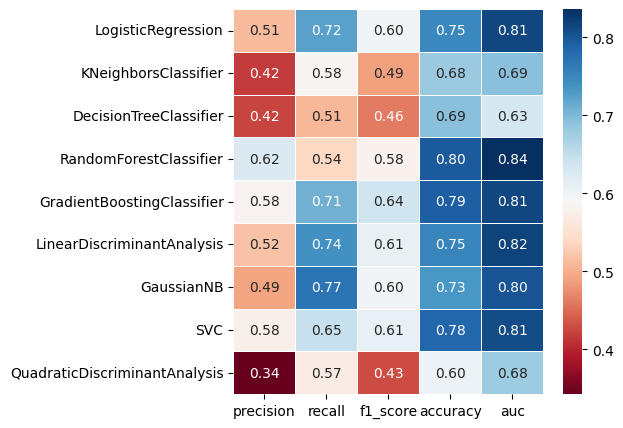




|                                 under-sampling                                 |


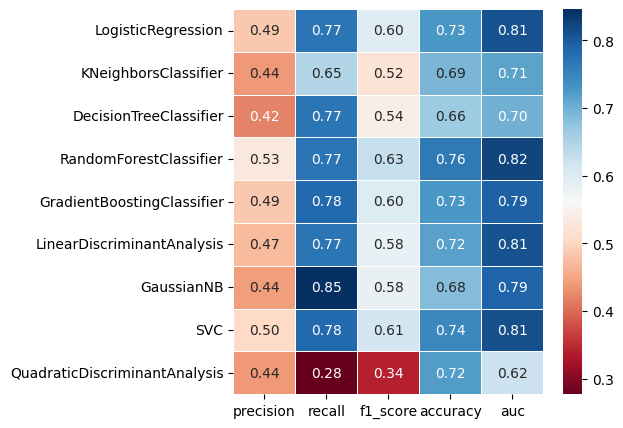




|                                  combination                                   |


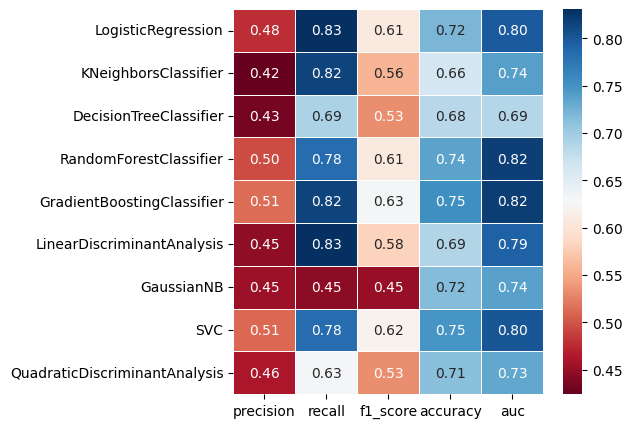

In [64]:
for i,r in enumerate(resutls_models):
  for title in r:
    centered_text = title.center(80)

    # Bold the text
    bold_text = f"\033[1m{centered_text}\033[0m"

    # Enclose the text in a border
    enclosed_text = f"{'='*82}\n|{bold_text}|\n{'='*82}"
    print(enclosed_text)
    index_values = []
    index_data = []
    for key, values in resutls_models[i][title].items():
      #print(key)
      index_values.append(str(key).split("(")[0])
      columns_values = []
      columns_data = []
      for a,b in values.items():
        columns_values.append(a)
        columns_data.append(b)
      index_data.append(columns_data)
    df = pd.DataFrame(index_data, index=index_values, columns=columns_values)

    # Dessiner un tableau avec sns.heatmap
    plt.figure(figsize = (5,5))
    sns.heatmap(df, annot=True,  fmt='.2f', linewidths=.5, cmap="RdBu",)

    # Afficher le tableau
    plt.show()
    print("\n\n")


Le modèle qui généralise le mieux nos données est celui entrainé avec l'algorithme du Grandient Boosting, avec la technique de l'over-sampling.

Ce modèle est celui qui a le meilleur compromis rappel-auc